In [8]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from get_kappa_crit_MC_sparse import run_dynamics_MC_sparse

In [11]:
def get_kappa_spec(num_rep, T, kappa_min, kappa_max, n_kappa):
    links = np.load("data/links.npy")
    kappa_range = np.linspace(kappa_min, kappa_max, n_kappa)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
    for i in tqdm(range(n_kappa)):
        kappa = kappa_range[i]
        density = np.zeros(T+1)
        for t in range(num_rep):
            density += run_dynamics_MC_sparse(links, T, kappa)
        density /= num_rep
        ax1.loglog(np.arange(T+1), density, label=f"kappa={kappa_range[i]}")
        ax2.loglog(np.arange(T+1)[10000:], density[10000:], label=f"kappa={kappa_range[i]}")
    plt.legend(fontsize=12)
    ax1.set_xlabel("Time", size=14)
    ax1.set_xlabel("Time", size=14)
    ax2.set_ylabel("Density", size=14)
    ax2.set_ylabel("Density", size=14)
    plt.show()

100%|██████████| 5/5 [12:14<00:00, 146.94s/it]


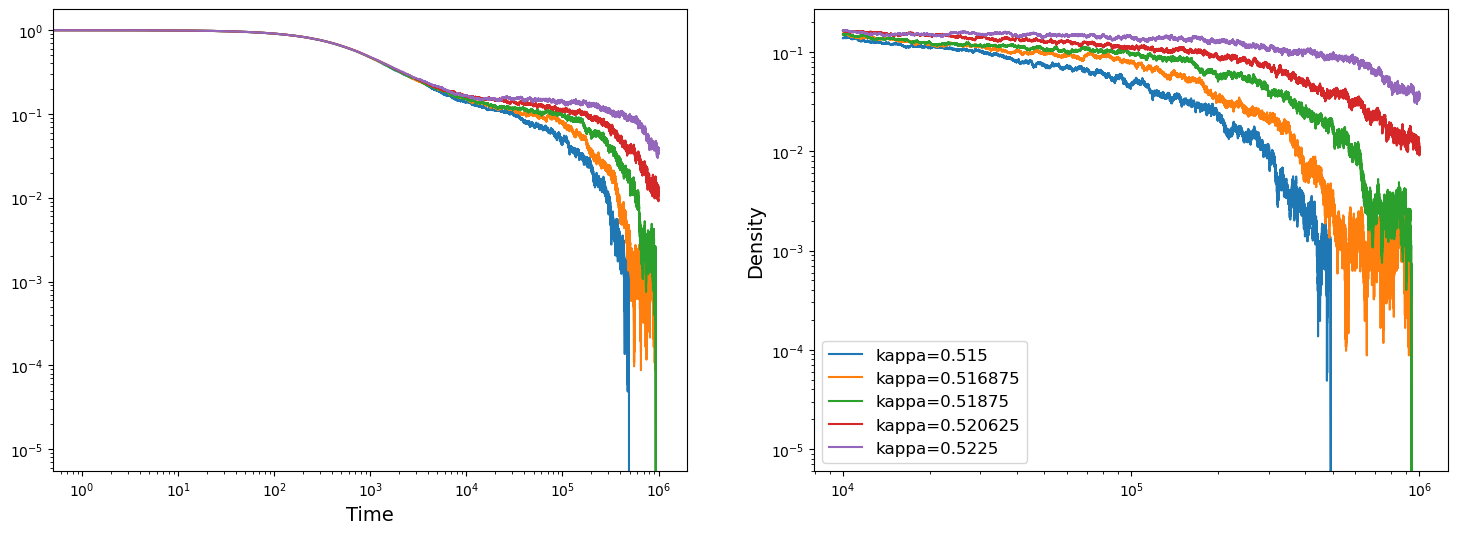

In [14]:

num_rep = 100
T = 1000000
kappa_min = 0.515
kappa_max = 0.5225
n_kappa = 5
r_c = get_kappa_spec(num_rep, T, kappa_min, kappa_max, n_kappa)